# ワイヤー配線のインピーダンス解析

Conductor 1 charge density range: 2.75375340560078e-12 1.1919728628540989e-11
Conductor 1 total charge: 3.549801742216631e-18
Conductor 2 charge density range: -1.7941755372783225e-11 -6.470510312258226e-12
Conductor 2 total charge: -6.589958486650214e-18
Conductor 3 charge density range: 5.660631306427598e-12 1.8268444999785336e-11
Conductor 3 total charge: 6.219326090557595e-18


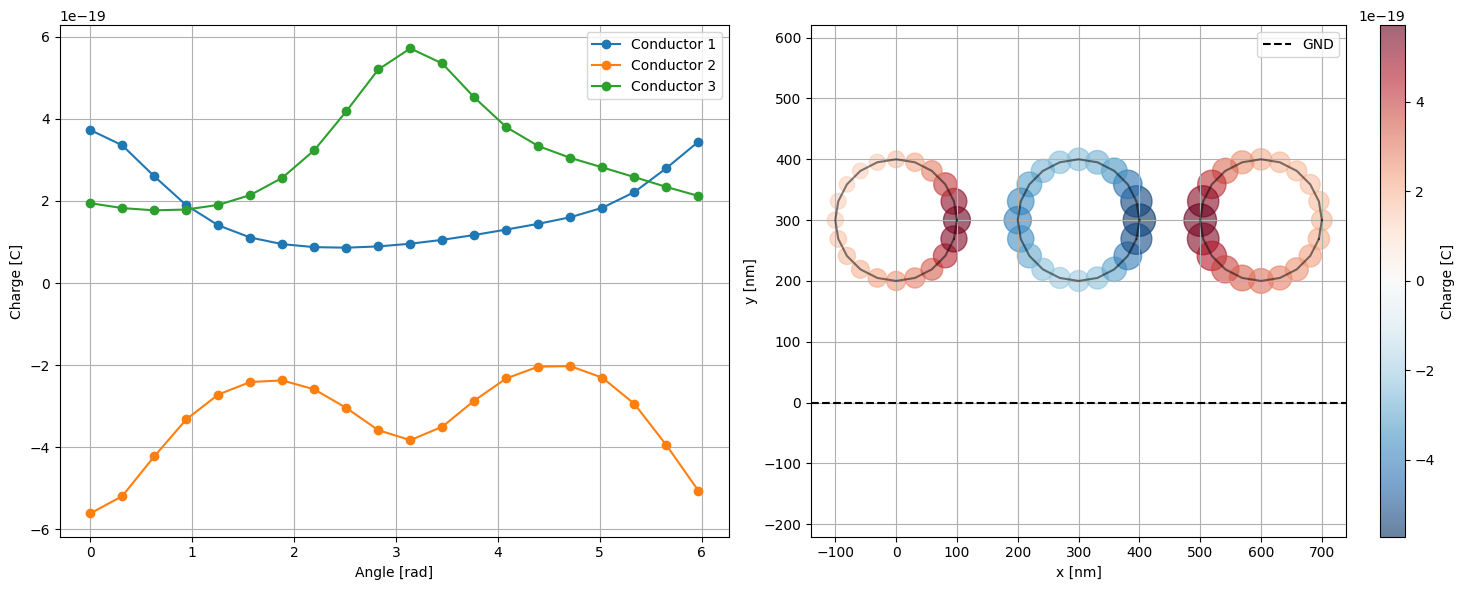

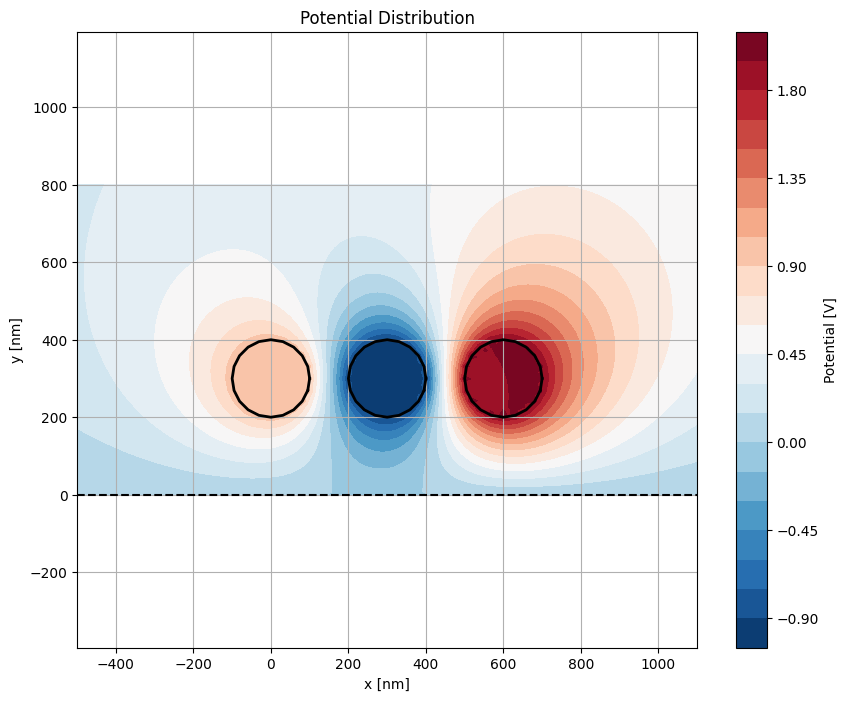

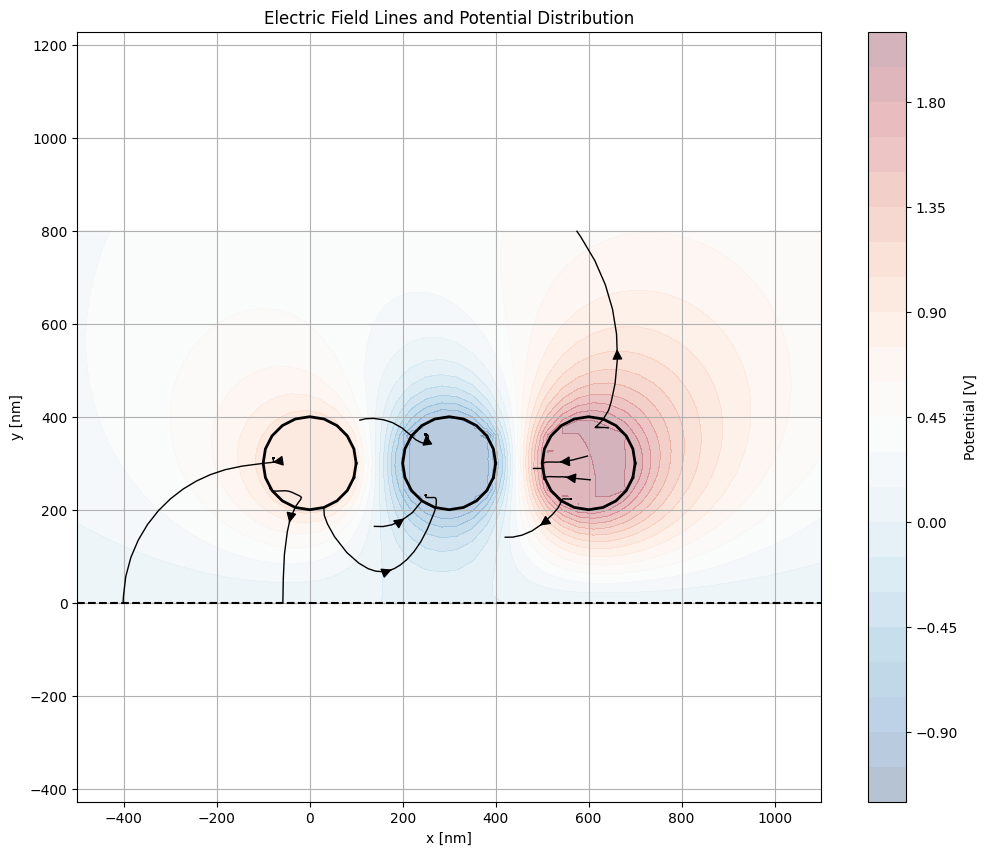


 C Matrix [F/m]:
[[ 8.25984025e-11 -3.63125956e-11 -2.72564510e-12]
 [-3.63125956e-11  1.01692220e-10 -3.63125956e-11]
 [-2.72564510e-12 -3.63125956e-11  8.25984025e-11]]

 L Matrix [H/m]:
[[1.68336546e-07 7.36566438e-08 3.79364431e-08]
 [7.36566438e-08 1.62014286e-07 7.36566438e-08]
 [3.79364431e-08 7.36566438e-08 1.68336546e-07]]

 Z Matrix [H/m]:
[[56.24797956 49.37699189 40.44184343]
 [49.37699189 57.74411953 49.37699189]
 [40.44184343 49.37699189 56.24797956]]
Capacitance matrix has been saved to ./out/test_circle.csv


In [3]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer


def test_circle():
  calculator = MultiConductorCalculator(epsilon_r=2.0)

  radius = 100e-9
  height = 300e-9
  spacing = 3 * radius
  n=20

  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=0.0)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing*2)

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density)
  
  # 電気力線描画
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # ピコファラッド単位で出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_circle.csv", unit_prefix='p')
 
if __name__ == "__main__":
  test_circle()
  